<p class='alert alert-danger'>
Only submissions in html format are accepted. Replace NetID by your NetID in the cell below and run the cell. DO NOT CHANGE THE NAME OF THIS NOTEBOOK. If characters have been added during download, rename the file to its original name. Do not modify the last cell, and don't forget to run it.


Thanks!
</p>

In [1]:

student_id = "solution"
print(student_id)
assignment_name = 'HW5_'+student_id


solution


The following cell should always be the first coding cell of your python notebooks

In [2]:
"""
importing the necessary libraries, do not modify
"""
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex, Math
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

import time
from IPython.display import clear_output

import SchemDraw as schem
import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }

from scipy.constants.constants import C2K
from scipy.constants.constants import K2C
from scipy.constants.constants import F2K
from scipy.constants.constants import K2F
from scipy.constants.constants import C2F
from scipy.constants.constants import F2C

time_stamp = np.zeros(10)
time_stamp[0] = time.time()

In [3]:
time_stamp[1] = time.time()

<h1>Problem 7.63</h1>
<p>
Consider two very long, straight fins of uniform cross section, as shown in Figure 3.17 of your book. The rectangular fin has dimensions $t=1\text{mm}$ and $w=20\text{mm}$. The circular pin fin has the same cross-sectional area as the rectangular fin. Both fins are constructed of aluminum with $k=237\text{W/m.K}$. In both cases, the base temperature is $T_b=85^\circ\text{􏰠C}$. Airflow is directed as shown in the figure, with $T_\infty=20^\circ\text{􏰠C}$ and $u_\infty=5\text{m/s}$. 
</p>
<p>
(a) Calculate the heat loss from each fin. Assume that the heat transfer coefficient on the edges of the rectangular fin is equal to the average value on the upper and lower surfaces. </p>
<p>
(b) What diameter cylindrical fin would be needed to provide the same fin heat transfer rate as the rectangular cross-section fin?
</p>

In [4]:
from NewLibraries import HT_conduction_extended_surfaces as condext
from NewLibraries import HT_external_convection as extconv



<h2>Rectangular fin</h2>
Heat transfer is in steady state. The surface temperature is assumed to be close to the base temperature $T_b$.
We assume uniform heat transfer rate over the surface the fin.


In [5]:
# Parameters:

U_infty = 5 #m/s
T_infty = 20. #C
T_b = 85. #C
w = 20e-3 #m
t = 1e-3 #m

# film temperature
T_f = (T_b+T_infty)/2.

from Libraries import thermodynamics as thermo


air = thermo.Fluid('air')
air.get_properties(C2K(T_f))

Re = U_infty*w/air.nu

print("End plate Reynolds number: %5.0f" %Re)
#?extconv.FlatPlate
rect_fin = extconv.FlatPlate("laminar","isothermal",U_infty,air.nu,air.alpha,w,0.,5.0e5)
rect_fin.average(w)
print("Average Nu: %4.1f" %rect_fin.Nu_ave)

h_rect_fin = rect_fin.Nu_ave*air.k/w
print("Average convection heat transfer coefficient: %2.1f W/m^2.K" %h_rect_fin)

# Solving for heat transfer over extended surfaces
P = 2*(w+t) #Perimeter
A_c = w*t # Cross sectional area
theta_b = T_b - T_infty
k_alum = 237. #W/mk

M = np.sqrt(h_rect_fin*P*A_c*k_alum)*theta_b
q_f = M

print("Heat transfer for an infinite fin: %2.2f W" %q_f)

End plate Reynolds number:  5502
Average Nu: 44.0
Average convection heat transfer coefficient: 61.5 W/m^2.K
Heat transfer for an infinite fin: 7.19 W


<h1>Problem 7.41</h1>

<p>
Consider atmospheric air at $u_\infty=2\text{m/s}$ and $T_\infty=300\text{K}$ in parallel flow over an isothermal flat plate of length $L=\text{m}$ and temperature $T_s=350\text{K}$.
<ol>
<li> Compute the local convection coefficient at the leading and trailing edges of the heated plate with or without an unheated starting length of $\xi=1\text{m}$.</li>
<li>Compute the average convection coefficient for the plate for the same condition as part (1)</li>
<li>Plot the variation of the loca convection coefficient over the plate with and without unheated starting length.</li>
</ol>
</p>
<h2> Assumptions</h2>
<p>
The flow and heat transfer are steady. Radiation is negligible.</p>
<h2> (1)</h2>
<p>
First you need to calculate the Reynolds number to figure out if the regime is laminar or turbulent. There are two systems, one $1\text{m}$ long, the other $1\text{m}$ long. You can either calculate the Reynolds number or make an assumption on the regime ("laminar" or "mixed").</p>

In [6]:
from NewLibraries import HT_external_convection as extconv
from NewLibraries import thermodynamics as thermo
u_infty = 2. #m/S
T_infty = 300. #K
T_s = 350. #K
T_f = (T_s+T_infty)/2.
L_2m = 2.
xi_2m = 1. #m
L_1m = 1. #m
flow = thermo.Fluid("air")
flow.get_properties(T_f)
?extconv.FlatPlate
# 2m plate
plate_2m=extconv.FlatPlate("laminar",'unheated starting length',u_infty,flow.nu,flow.alpha,L_2m,xi = xi_2m)
print("Trailing edge Reynolds number for 2m plate: %1.3e " %plate_2m.Re_L)
# 1m plate
plate_1m=extconv.FlatPlate("laminar",'isothermal',u_infty,flow.nu,flow.alpha,L_1m)
print("Trailing edge Reynolds number for 1m plate: %1.3e " %plate_1m.Re_L)
plate_2m.local(L_2m)


Trailing edge Reynolds number for 2m plate: 2.208e+05 
Trailing edge Reynolds number for 1m plate: 1.104e+05 


<p>The regime is indeed laminar. The local convection coefficient may now be determined using, for the $1\text{m}$ plate,
$$
Nu_x=\frac{h_x x}{k}=0.332Re_x^{1/2}Pr^{1/3}
$$
and for the $2\text{m}$ plate:
$$
Nu_x=\frac{\left.Nu_x\right\vert_{\xi=0}}{\left[1-(\xi/x)^{3/4}\right]^{1/3}}
$$
At the leading edge of the heated plate, the temperature profile jumps from $T_\infty$ in the flow to $T_s$ at the wall. Since there is no flow at the wall, Fourier's law applies:
$$
q_x'' = \left.-k\frac{\partial T}{\partial y}\right\vert_{x,y=0}=h_x(T_s-T_\infty)
$$
The jump results in $\left.\partial T/\partial y\right\vert_{x,y=0}\rightarrow\infty$, therefore at the leading edge of either heated plate:
$$
h_{x=\text{leading edge}}=\infty
$$
</p>

In [7]:
# 2m plate
plate_2m.local(L_2m)
hx_2m = plate_2m.Nu_x*flow.k/L_2m
print("Local convection coefficient at the trailing edge for 2m plate: %1.2f W/m^.K" %hx_2m)

# 1m plate

plate_1m.local(L_1m)
hx_1m = plate_1m.Nu_x*flow.k/L_1m
print("Local convection coefficient at the trailing edge for 1m plate: %1.2f W/m^.K" %hx_1m)


Local convection coefficient at the trailing edge for 2m plate: 2.63 W/m^.K
Local convection coefficient at the trailing edge for 1m plate: 2.75 W/m^.K


<h2>(2)</h2>
<p>
Similarly, the average coefficients, calculated from the correlations for the average Nusselt number $\overline{Nu}$, are:
</p>

In [8]:
# 2m plate
plate_2m.average(L_2m)
have_2m = plate_2m.Nu_ave*flow.k/L_2m
print("Average convection coefficient at the trailing edge for 2m plate: %1.2f W/m^.K" %have_2m)

# 1m plate

plate_1m.average(L_1m)
have_1m = plate_1m.Nu_ave*flow.k/L_1m
print("Average convection coefficient at the trailing edge for 1m plate: %1.2f W/m^.K" %have_1m)


Average convection coefficient at the trailing edge for 2m plate: 4.26 W/m^.K
Average convection coefficient at the trailing edge for 1m plate: 5.50 W/m^.K


<h2>(3)</h2>
<p>
To plot the variation of the local convection coefficient, I used a logarithmic distribution of points on the plate rather than a linear one in order to better capture the power-law variation of $h_x$. It also avoids the leading edge for which $h_x=\infty$. The two distributions are plotted with the $x$ origin at the leading edge of the heated plate.
</p>

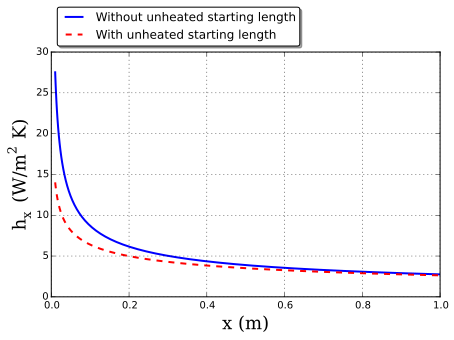

In [9]:
N = 50
x_1m = np.logspace(-2,0,N)
x_2m = xi_2m+x_1m
h_x_1m = np.zeros(N)
h_x_2m = np.zeros(N)
for i in range(N):
    plate_1m.local(x_1m[i])
    h_x_1m[i] = plate_1m.Nu_x*flow.k/x_1m[i]
    plate_2m.local(x_2m[i])
    h_x_2m[i] = plate_2m.Nu_x*flow.k/x_2m[i]
plt.plot(x_1m, h_x_1m, lw=2, label="Without unheated starting length")
plt.plot(x_1m, h_x_2m, 'r--', lw=2, label="With unheated starting length")
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=1, shadow=True, fancybox=True)
plt.ylabel(r'$h_x}$ ($W/m^2K$)', fontdict = font)
plt.xlabel(r'$x$ (m)', fontdict = font)
plt.grid(True)
plt.show()

<h1>Problem 7.48</h1>

<p>An $L=􏰡1\text{-m}$-long vertical copper tube of inner diameter $D_i=20\text{mm}$ and wall thickness $t=2\text{mm}$ contains liquid water at $T_w\approx 0^\circ\text{􏰠C}$. On a winter day, air at $V_\infty=􏰡3\text{m/s}$, $T_\infty=􏰝􏰡-20^\circ\text{􏰠C}$ is in crossflow over the tube. 
<ol><li> Determine the heat loss per unit mass from the water (W/kg) when the tube is full of water.</li> 
<li>Determine the heat loss from the water (W/kg) when the tube is half full.</li>
</ol>
</p>
<h2>(1)</h2>
<h3>Assumptions</h3>
Steady-state conditions, inner wall is at $T_w\approx 0^\circ\text{􏰠C}$ and negligible radiation. 
<h3>Convection coefficient</h3>
<p>
Regardless of the configuration, we need the average convection coefficient from the tube to the outside air. Although not entirely accurate, the air film temperature is estimated at:
$$
T_f=\frac{T_w+T_\infty}{2}=\frac{0^\circ\text{C}-20^\circ\text{C}}{2}
$$
</p>

In [10]:
from NewLibraries import HT_external_convection as extconv
from NewLibraries import thermodynamics as thermo
T_w = 0.
T_infty = -20.
T_f = -10.
V_infty = 3. #m/s
D_o = 24e-3 #m
D_i = 20e-3 #m
L = 1. #m
air = thermo.Fluid("air")
air.get_properties(C2K(T_f))
Re_o = V_infty*D_o/air.nu

print("Re_o=%3.0f" %Re_o)
?extconv.CircularCylinder

tubeHT = extconv.CircularCylinder('Churchill-Bernstein',Re_o,air.Pr)

h_o = tubeHT.Nu*air.k/D_o
print("Average convection coefficient h_o=%2.2f W/m^2.K (using Churchill-Bernstein)" %h_o)

Re_o=5737
Average convection coefficient h_o=38.92 W/m^2.K (using Churchill-Bernstein)


<p>The heat rate is readily available from the thermal resistance analysis of the problem</p>

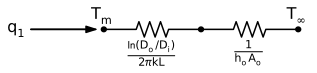

In [11]:
from NewLibraries import HT_thermal_resistance as res
R = []
R.append(res.Resistance(r"$\frac{\ln(D_o/D_i)}{2\pi k L}$","W"))
R.append(res.Resistance(r"$\frac{1}{h_oA_o}$","W"))


#?res.Resistance
k_copper = 401. #W/m.K
R[0].conduction("cylindrical", k_copper, L_pipe = L, r_a = D_i/2., r_b = D_o/2.)
R[1].convection(h_o,np.pi*D_o*L)
d = schem.Drawing()
d.add( e.DOT, label = r"$T_m$")
d.add( e.RES, d = "right", botlabel = R[0].name)
d.add( e.DOT)
d.add( e.RES, d = "right", botlabel = R[1].name)
d.add( e.DOT, label = r"$T_\infty$")
Flux0 = d.add( e.LINE, lftlabel = r"$q_1$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(Flux0, arrowofst = 0)
d.draw()
R_tot = res.serial_sum(R,0,1)

<p>The heat rate is
$$
q_1 = \frac{1}{R_{tot}}\left(T_w-T_\infty\right),
$$
and the mass of water contained in the copper tube is 
$$
M_1 = \rho_w\frac{\pi}{4}D_i^2L,
$$
where $\rho_w\approx 1000\text{kg/m$^3$}$. Hence the heat loss per unit mass is 
$$q_1/M_1.$$
</p>


In [12]:
q_1 = (T_w - T_infty)/R_tot
print("Heat rate for pipe full of water: %2.2f W" %q_1)
rho_w = 1000. #kg/m^3
M_1 = (np.pi/4.)*D_i**2*L*rho_w
q_M1 = q_1/M_1
print("Heat loss per unit mass: %2.2f W/kg" %q_M1)

Heat rate for pipe full of water: 58.68 W
Heat loss per unit mass: 186.79 W/kg


<h2>(2)</h2>
<p>
When the pipe is half full, the upper part acts as a fin and the heat rate is the combination of the convection heat rate and the fin heat rate. The heat loss of the lower section is half that of the tube full of water but so is the mass of water. Therefore the heat loss per unit mass in the lower half is the same as before $q_1/M_1$</p>
<p> The cross sectional area of the fin is 
$$
A_c = \frac{\pi}{4}\left(D_o^2-D_i^2\right)
$$
and the perimeter is
$$
P=\pi D_o.
$$
The convection coefficient is $h_o$ calculated before.
</p>

In [13]:
from NewLibraries import HT_conduction_extended_surfaces as condext
A_c = (np.pi/4.)*(D_o**2-D_i**2)
P_c = np.pi*D_o
T_b = T_w
L_fin = 0.5 #m

fin = condext.ExtSurfaces(T_b,T_infty,T_infty,k_copper,h_o,P_c,A_c,L_fin)
fin.heat_rate('infinite')
print("Heat loss through the fin: %2.2f W" %fin.q_f)
q_Mfin = fin.q_f/(M_1/2.)
print("Total heat loss per unit mass of water: %3.2f + %2.2f = %3.2f W" %(q_M1,q_Mfin,q_M1+q_Mfin))

Heat loss through the fin: 8.07 W
Total heat loss per unit mass of water: 186.79 + 51.35 = 238.15 W


<h1>Problem 7.56</h1>

<p>Hot water at $50^\circ\text{C}$ is routed from one building in which it is generated to an adjoining building in which it is used for space heating. Transfer between the buildings occurs in a steel pipe ($k=􏰡60\text{W/m􏰘K}$) of $100\text{-mm}$ outside diameter and $8\text{-mm}$ wall thickness. During the winter, representative environmental conditions involve air at $T_\infty=􏰝-􏰕5^\circ\text{􏰠C}$ and $V_\infty=􏰡3\text{m/s}$ in cross flow over the pipe. 
<ol><li>If the cost of producing the hot water is $\$0.10$ per $\text{kW.h}$, what is the representative daily cost of heat loss from an uninsulated pipe to the air per meter of pipe length? The convection resistance associated with water flow in the pipe may be neglected.</li>
<li>Determine the savings associated with application of a $10\text{-mm}$-thick coating of urethane insulation ($k=0.026\text{W/m.K}$) to the outer surface of the pipe.</li>
</ol>
</p>

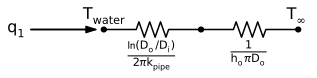

In [14]:
T_infty = -5. #C
V_infty = 3. #m/s
T_water = 50. #C
D_i_pipe = 84e-3 #m
D_o_pipe = 100e-3 #m
k_pipe = 60 #W/m.K

R = []
R.append(res.Resistance(r"$\frac{\ln(D_o/D_i)}{2\pi k_{pipe}}$","W/m"))
R.append(res.Resistance(r"$\frac{1}{h_o\pi D_o}$","W/m"))
d = schem.Drawing()
d.add( e.DOT, label=r"$T_{water}$")
d.add( e.RES, d = 'right', botlabel=R[0].name)
d.add( e.DOT)
d.add( e.RES, d = 'right', botlabel=R[1].name)
d.add( e.DOT, label = r"$T_\infty$")
Flux0 = d.add( e.LINE, lftlabel = r"$q_1$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(Flux0, arrowofst = 0)
d.draw()
R[0].conduction("cylindrical", k = k_pipe, r_a = D_i_pipe/2., r_b = D_o_pipe/2.)


In [15]:

#first guess: T_s = T_water
T_f = (T_water+T_infty)/2.
air = thermo.Fluid("air")
air.get_properties(C2K(T_f))
print("First film temperature guess: %3.2f K" %C2K(T_f))
Re = V_infty*D_o_pipe/air.nu
print("Reynolds number: %5.0f"%Re)
#?extconv.CircularCylinder
air_conv = extconv.CircularCylinder('Churchill-Bernstein',Re,air.Pr)
print("Nu = %2.2f" %air_conv.Nu)
h_o = air_conv.Nu*air.k/D_o_pipe

print("Convection coefficient %2.2f W/m^2.K" %h_o)
R[1].convection(h_o,np.pi*D_o_pipe)
q_1 = (T_water-T_infty)/res.serial_sum(R,0,1)
print("Heat loss per unit pipe length: q'=%3.0f W" %q_1)
T_s = T_water - q_1*R[0].R
print("Surface temperature: T_s = %2.1f C"%T_s)

First film temperature guess: 295.65 K
Reynolds number: 19554
Nu = 78.36
Convection coefficient 20.27 W/m^2.K
Heat loss per unit pipe length: q'=349 W
Surface temperature: T_s = 49.8 C


In [16]:
Cost = q_1 * 0.1e-3 * 24.
print("Daily cost: $%1.3f /m.d" %Cost)

Daily cost: $0.838 /m.d


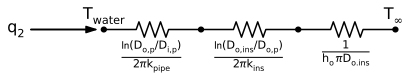

In [17]:
D_o_ins = 120e-3 #m
k_ins = 0.026 #W/m.K
R2 = []
R2.append(res.Resistance(r"$\frac{\ln(D_{o,p}/D_{i,p})}{2\pi k_{pipe}}$","W/m"))
R2.append(res.Resistance(r"$\frac{\ln(D_{o,ins}/D_{o,p})}{2\pi k_{ins}}$","W/m"))
R2.append(res.Resistance(r"$\frac{1}{h_o\pi D_{o.ins}}$","W/m"))

d = schem.Drawing()
d.add( e.DOT, label=r"$T_{water}$")
d.add( e.RES, d = 'right', botlabel=R2[0].name)
d.add( e.DOT)
d.add( e.RES, d = 'right', botlabel=R2[1].name)
d.add( e.DOT)
d.add( e.RES, d = 'right', botlabel=R2[2].name)
d.add( e.DOT, label = r"$T_\infty$")
Flux0 = d.add( e.LINE, lftlabel = r"$q_2$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(Flux0, arrowofst = 0)
d.draw()
R2[0].conduction("cylindrical", k = k_pipe, r_a = D_i_pipe/2., r_b = D_o_pipe/2.)
R2[0].conduction("cylindrical", k = k_ins, r_a = D_o_pipe/2., r_b = D_o_ins/2.)

In [18]:
#first guess: T_s = T_water
T_f = (T_water+T_infty)/2.
air = thermo.Fluid("air")
air.get_properties(C2K(T_f))
print("First film temperature guess: %3.2f K" %C2K(T_f))
Re = V_infty*D_o_pipe/air.nu
print("Reynolds number: %5.0f"%Re)
#?extconv.CircularCylinder
air_conv = extconv.CircularCylinder('Churchill-Bernstein',Re,air.Pr)
print("Nu = %2.2f" %air_conv.Nu)
h_o = air_conv.Nu*air.k/D_o_pipe

print("Convection coefficient %2.2f W/m^2.K" %h_o)
R2[2].convection(h_o,np.pi*D_o_ins)
q_2 = (T_water-T_infty)/res.serial_sum(R,0,1)
print("Heat loss per unit pipe length: q'=%3.1f W" %q_2)
T_s = T_infty + q_2*R2[2].R
print("Surface temperature: T_s = %2.1f C"%T_s)

First film temperature guess: 295.65 K
Reynolds number: 19554
Nu = 78.36
Convection coefficient 20.27 W/m^2.K
Heat loss per unit pipe length: q'=349.3 W
Surface temperature: T_s = 40.7 C


In [19]:
#second guess: T_s = 0.7
T_f = (0.7+T_infty)/2.
air = thermo.Fluid("air")
air.get_properties(C2K(T_f))
print("second film temperature guess: %3.2f K" %C2K(T_f))
Re = V_infty*D_o_pipe/air.nu
print("Reynolds number: %5.0f"%Re)
#?extconv.CircularCylinder
air_conv = extconv.CircularCylinder('Churchill-Bernstein',Re,air.Pr)
print("Nu = %2.2f" %air_conv.Nu)
h_o = air_conv.Nu*air.k/D_o_pipe

print("Convection coefficient %2.2f W/m^2.K" %h_o)
R2[2].convection(h_o,np.pi*D_o_ins)
q_2 = (T_water-T_infty)/res.serial_sum(R,0,1)
print("Heat loss per unit pipe length: q'=%3.1f W" %q_2)
T_s = T_infty + q_2*R2[2].R
print("Surface temperature: T_s = %2.1f C"%T_s)
Cost = q_2 * 0.1e-3 * 24.
print("Daily cost: $%1.3f /m.d" %Cost)

second film temperature guess: 271.00 K
Reynolds number: 22833
Nu = 85.74
Convection coefficient 20.69 W/m^2.K
Heat loss per unit pipe length: q'=349.3 W
Surface temperature: T_s = 39.8 C
Daily cost: $0.838 /m.d


<h1> PB 7.67</h1>
<p>
To augment heat transfer between two flowing fluids, it is proposed to insert a $100\text{-mm}$-long, $5\text{-mm}$-diameter 2024 aluminum pin fin through the wall separating the two fluids. The pin is inserted to a depth of $d$ into fluid 1. Fluid 1 is air with a mean temperature of $10^\circ\text{C}$ and velocity of $10\text{m/s}$. Fluid 2 is air with a mean temperature of $40^\circ\text{C}$ and velocity of $3\text{m/s}$.
<ol><li>Determine the rate of heat transfer from the warm air to the cool air through the pin fin for $d=50\text{mm}$.</li>
<li>Plot the variation of the heat transfer rate with the insertion distance, $d$. Does an optimal insertion distance exist?</li>
</ol>
</p>

<h2>Assumptions</h2>
<p> Steady state, negligible radiation, boundary layers are neglected (velocity is uniform) and all thermodynamics properties are estimated at the mean of the two stream velocities ($T_f=25^\circ\text{C}$)
</p>
<h2>Method</h2>
<p>
Since the distance $d$ varies in question 2, we develop our analysis as a function of the parameter d. The analysis is to be conducted using the assumption of adiabatic length with the modified lengths:
$$
L_{c1}=d+\frac{D}{4},
$$
$$
L_{c2}=L-d+\frac{D}{4},
$$
such that the heat rates are
$$
q_1 = M_1\tanh(m_1L_{c1}),
$$
$$
q_2 = M_2\tanh(m_2L_{c2}),
$$
with 
$$
M_1=\sqrt{h_1PkA_c}\theta_{b1}=\sqrt{h_1PkA_c}(T_b-T_{\infty 1}),\; m_1=\sqrt{\frac{h_1P}{kA_c}},
$$
$$
M_2=\sqrt{h_2PkA_c}\theta_{b2}=\sqrt{h_2PkA_c}(T_b-T_{\infty 2}),\; m_2=\sqrt{\frac{h_2P}{kA_c}}.
$$
Here the base temperature $T_b$ is the temperature at the wall.
At thermal equilibrium, heat enters the bottom part of the fin, transfers to the upper part and escpaes into the fluid 1. At the wall, the heat rate leaving the bottom part must be equal to the heat rate entering the upper part. Since $\theta_b = T_b-T_infty$, $q_2$ is negative and $q_1$ is positive. Therefore conservation of energy at the interface between the two fluid writes:
$$
q_1=-q_2.
$$
For any given $d$, the only unknown in this equation is $T_b$ in variables $M_1$ and $M_2$:
$$
\sqrt{h_1PkA_c}(T_b-T_{\infty 1})\tanh(m_1L_{c1})=-\sqrt{h_2PkA_c}(T_b-T_{\infty 2})\tanh(m_2L_{c2})
$$
or
$$
\left(\frac{\sqrt{h_1PkA_c}\tanh(m_1L_{c1})}{\sqrt{h_2PkA_c}\tanh(m_2L_{c2})}+1\right)T_b=
\frac{\sqrt{h_1PkA_c}\tanh(m_1L_{c1})}{\sqrt{h_2PkA_c}\tanh(m_2L_{c2})}T_{\infty 1}+T_{\infty 2}
$$
which can be reduced to:
$$
T_b=\frac{CT_{\infty 1}+T_{\infty 2}}{1+C}
$$
with
$$
C=\frac{\sqrt{h_1PkA_c}\tanh(m_1L_{c1})}{\sqrt{h_2PkA_c}\tanh(m_2L_{c2})}
$$
and
$$
P=\pi D\text{, and } A_c=\pi\frac{D^2}{4}
$$
The convection coefficients are determined using the Churchill Bernstein correlation. From the knowledge of $T_b$, the heat rate can be computed from either $q_1$ or $q_2$. The following defines a function to compute $q_1$.
</p>

In [20]:
D = 5.e-3 #mm

T_infty1 = 10. #C
V_infty1 = 10. #m/s
T_infty2 = 40. #C
V_infty2 = 3. #m/s
T_f = 25. #C
k_fin = 177. #W/m.K
air = thermo.Fluid("air")
air.get_properties(C2K(T_f))
Re_1 = V_infty1*D/air.nu
Re_2 = V_infty2*D/air.nu
L = 100.e-3 #mm

airflow_1 = extconv.CircularCylinder('Churchill-Bernstein',Re_1,air.Pr)
airflow_2 = extconv.CircularCylinder('Churchill-Bernstein',Re_2,air.Pr)

h_1 = airflow_1.Nu*air.k/D
h_2 = airflow_2.Nu*air.k/D
print("Convection coefficient for Fluid 1: %3.1f W/m^2.K" %h_1)
print("Convection coefficient for Fluid 2: %3.1f W/m^2.K" %h_2)
P = np.pi*D
A_c = 0.25*np.pi*D**2
m_1 = np.sqrt(h_1*P/(k_fin*A_c))
m_2 = np.sqrt(h_2*P/(k_fin*A_c))
M_1_wotheta = np.sqrt(h_1*P*k_fin*A_c)
M_2_wotheta = np.sqrt(h_2*P*k_fin*A_c)

def heat_rate(d):
    L_c1 = d + D/4.
    L_c2 = L - d + D/4.
    C = (M_1_wotheta*np.tanh(m_1*L_c1))/(M_2_wotheta*np.tanh(m_2*L_c2))
    T_b = (C*T_infty1 + T_infty2)/(1.+ C)
    M_1 = M_1_wotheta*(T_b - T_infty1)
    return M_1*np.tanh(m_1*L_c1)

print("Heat rate for d=50 mm: %1.3f W" %heat_rate(50e-3))


Convection coefficient for Fluid 1: 152.0 W/m^2.K
Convection coefficient for Fluid 2: 81.9 W/m^2.K
Heat rate for d=50 mm: 0.927 W


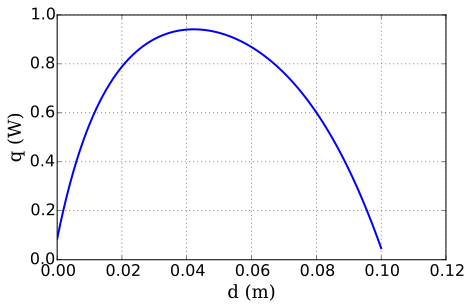

In [21]:
N = 100
d = np.linspace(0.,0.1,N)
q = np.zeros(N)
for i in range (N):
    q[i] = heat_rate(d[i])
plt.plot(d, q, lw=2)
plt.xlabel(r'$d$ ($m$)', fontdict = font)
plt.ylabel(r'$q$ ($W$)', fontdict = font)
plt.grid(True)
plt.show()

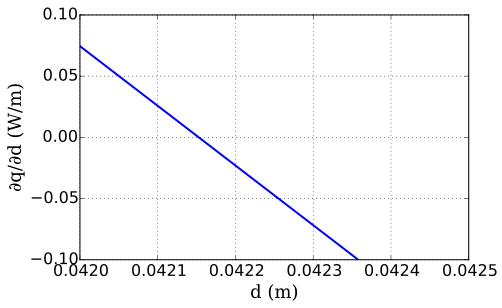

In [22]:
dd = d[1]-d[0]
dq = np.gradient(q,dd)
plt.plot(d,dq,lw = 2)
plt.xlim(0.042,0.0425)
plt.ylim(-0.1,0.1)
plt.xlabel(r'$d$ ($m$)', fontdict = font)
plt.ylabel(r'$\partial q/\partial d$ ($W/m$)', fontdict = font)
plt.grid(True)
plt.show()

By taking the derivative of $q$, the maximum heat rate is $d\approx 42.15\text{mm}$

In [23]:
!ipython nbconvert --to html ME144-HW5.ipynb --template full --output $assignment_name

[NbConvertApp] Converting notebook ME144-HW5.ipynb to html
[NbConvertApp] Writing 446923 bytes to HW5_solution.html
